## Simple Moving Average and Exponential Moving Average mix strategy

Can we have a faster moving exponential average and then a simple moving average. If the exponential average is above the simple moving average we can go long and if it is below, we are going to go short. 

Here, we are going to test out a strategy of EMA period 20 days and SMA period of 100 days

In [1]:
import pandas as pd 
import numpy as np 
from strategies import OANDASMAEMAStrategy

In [4]:
strat_params = {
    'instrument': 'EUR_USD', 
    'ema_period': 20, 
    'sma_period': 100, 
    'start_date': '2010-01-01', 
    'end_date': '2022-07-22', 
    'granularity': 'D'
}

strategy = OANDASMAEMAStrategy(**strat_params)

In [5]:
results = strategy.run_strategy()

In [6]:
results[0]

{'total_return': 0.397101657796322,
 'annualized_return': 0.02441865003201663,
 'annualized_vol': 0.08207447569778799,
 'sharpe': 0.2975181970327804}

Looking at the initial statistics, we can see a very large positive return of 40% over the period. However, annualizing that you have a 2% log return and 8% standard deviation. The sharpe ratio here is about 0.3 which is not that high. 


In [13]:
result_df = results[1]
result_df.head()

,c,log_c,log_c_returns,EMA_20,SMA_100,strategy_position,strategy_return,strategy_cumulative_return
time,,,,,,,,
2010-04-13 21:00:00,1.36534,0.311403,0.002919,1.359458,1.379213,-1.0,-0.002919,0.997081
2010-04-14 21:00:00,1.35729,0.305490,-0.005913,1.359382,1.378483,-1.0,0.005913,1.002994
2010-04-15 21:00:00,1.35028,0.300312,-0.005178,1.359063,1.377573,-1.0,0.005178,1.008172
2010-04-16 21:00:00,1.35014,0.300208,-0.000104,1.358751,1.376709,-1.0,0.000104,1.008276
2010-04-17 21:00:00,1.34744,0.298206,-0.002002,1.358355,1.375776,-1.0,0.002002,1.010278


<AxesSubplot:xlabel='time'>

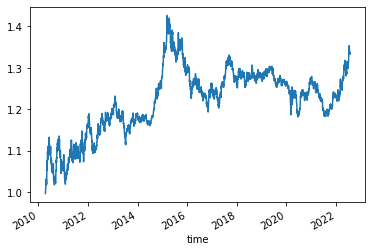

In [17]:
result_df['strategy_cumulative_return'].plot()

<AxesSubplot:xlabel='time'>

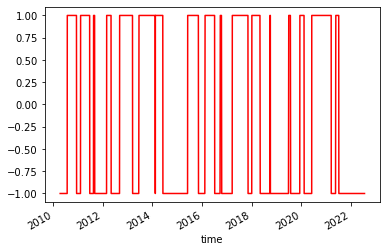

In [19]:
result_df['strategy_position'].plot(color = 'red')

In [26]:
result_df['drawdown'] = -(result_df['strategy_cumulative_return'].cummax() - result_df['strategy_cumulative_return'])

<AxesSubplot:xlabel='time'>

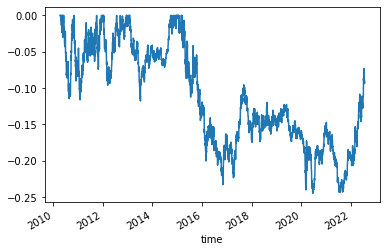

In [27]:
result_df['drawdown'].plot()